In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from talib import RSI, BBANDS, MACD

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
sns.set_style('whitegrid')
idx = pd.IndexSlice

## Data Retrieval

In [3]:
DATA_STORE = '../../data/assets.h5'

In [4]:
with pd.HDFStore(DATA_STORE) as store:
    data = (store['alpaca/tesla/prices']
            .loc[idx['2018':'2023', 'TSLA'],
                 ['open', 'high', 'low', 'close', 'volume']]
            .unstack('symbol')
            .swaplevel(axis=1)
            .loc[:, 'TSLA'])

display(data.info())
display(data.head())


<class 'pandas.core.frame.DataFrame'>
Index: 805588 entries, 2018-01-02 09:48:00+00:00 to 2022-10-06 23:59:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    805588 non-null  float64
 1   high    805588 non-null  float64
 2   low     805588 non-null  float64
 3   close   805588 non-null  float64
 4   volume  805588 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 36.9+ MB


None

,open,high,low,close,volume
timestamp,,,,,
2018-01-02 09:48:00+00:00,312.00,312.00,312.00,312.00,200
2018-01-02 09:50:00+00:00,311.80,311.80,311.80,311.80,300
2018-01-02 10:28:00+00:00,311.50,311.50,311.50,311.50,847
2018-01-02 11:07:00+00:00,310.99,310.99,310.99,310.99,307
2018-01-02 11:09:00+00:00,310.99,310.99,310.99,310.99,126


## Compute Bollinger Bands

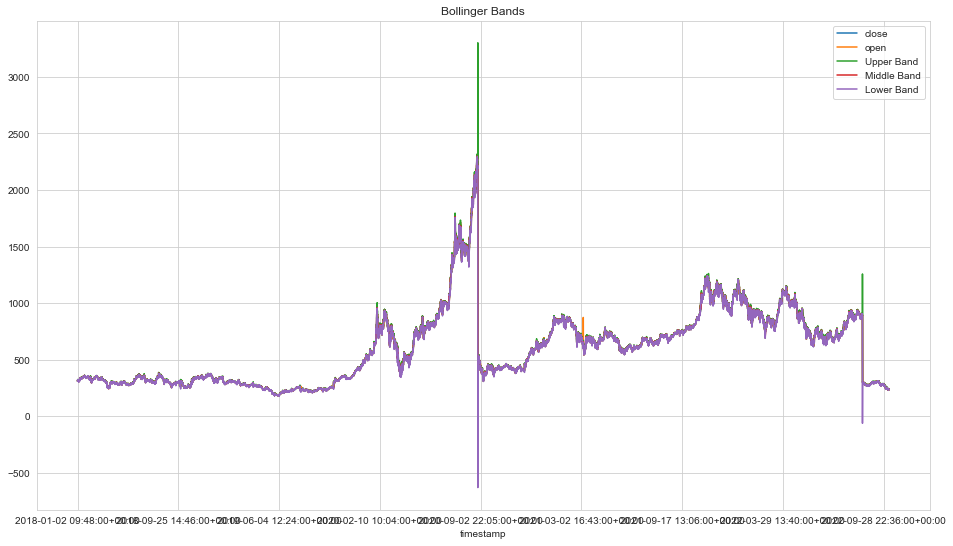

In [5]:
# Compute Bollinger Bands
up, mid, low = BBANDS(data.close, timeperiod=21, nbdevup=2, nbdevdn=2, matype=0)

# Visualization 
data[['close', 'open']].plot(figsize=(16, 9), title='Bollinger Bands')
plt.plot(up, label='Upper Band')
plt.plot(mid, label='Middle Band')
plt.plot(low, label='Lower Band')
plt.legend(loc='best')
plt.show()

In [6]:
# Save plot of Bollinger Bands as jpeg in the images folder
#plt.savefig('../images/bollinger_bands_tesla.jpeg')

## Compute Relative Strength Index

In [7]:
rsi = RSI(data.close, timeperiod=14)

In [8]:
# Save RSI plot as jpeg
#plt.savefig('../images/rsi_tesla.jpeg')

## Moving Average Convergence/Divergence

In [9]:
macd, macdsignal, macdhist = MACD(data.close, fastperiod=12, slowperiod=26, signalperiod=9)

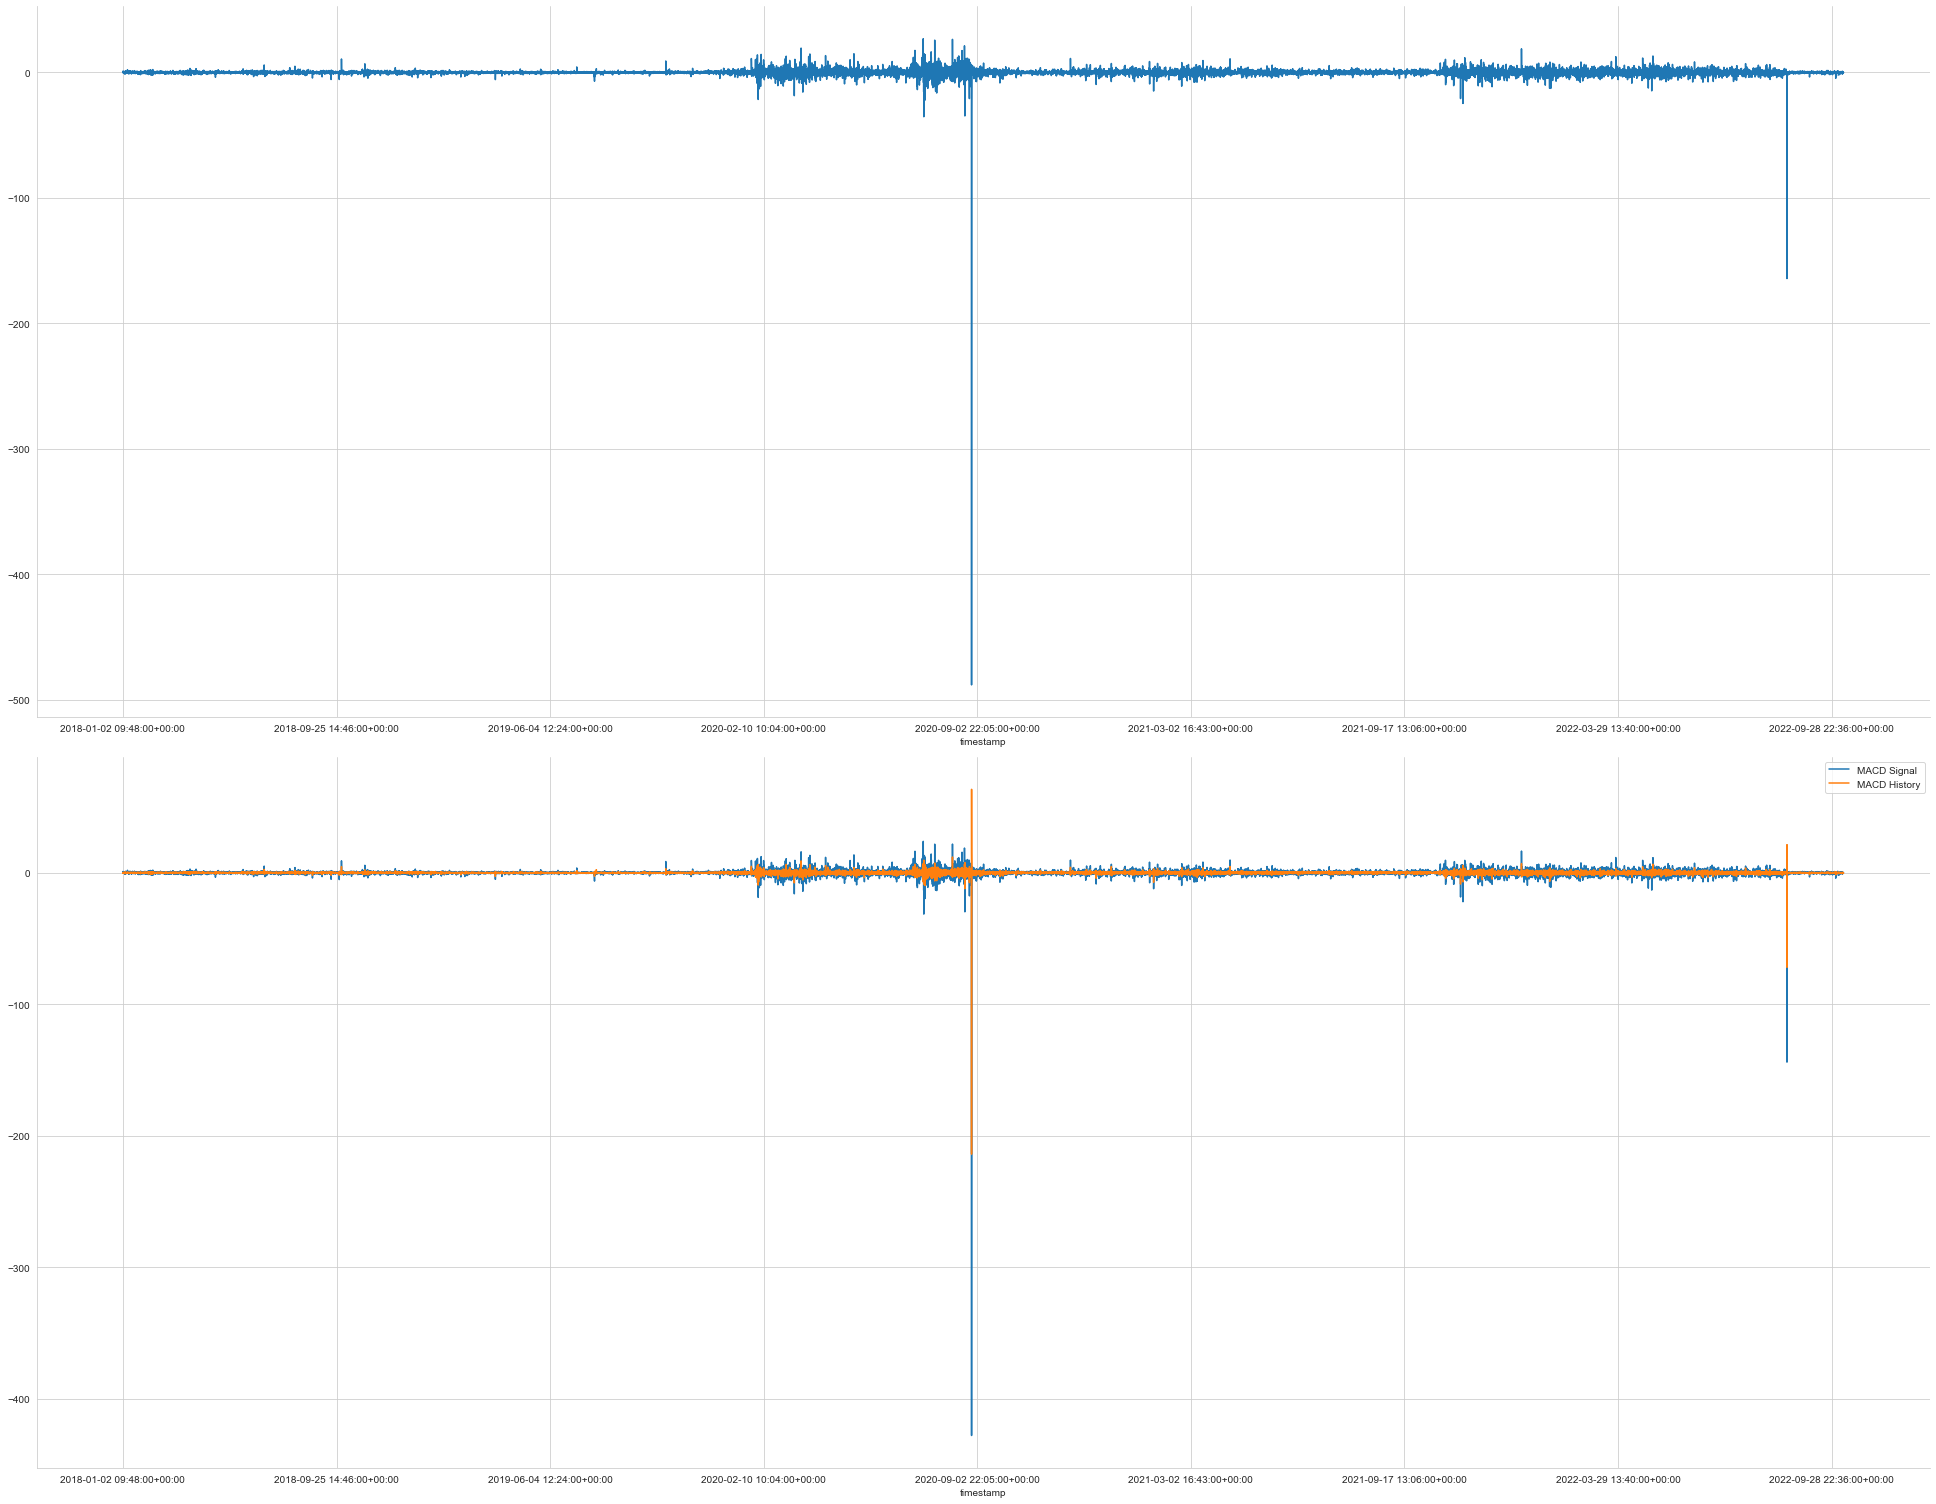

In [10]:
macd_data = pd.DataFrame({'TSLA': data.close, 'TSLA': macd, 'MACD Signal': macdsignal, 'MACD History': macdhist})

fig, axes= plt.subplots(nrows=2, figsize=(27, 21))
macd_data.TSLA.plot(ax=axes[0])
macd_data.drop('TSLA', axis=1).plot(ax=axes[1])
fig.tight_layout()
sns.despine();

In [11]:
# Save MCA plot as jpeg
plt.savefig('../images/macd_tesla.jpeg')

<Figure size 432x288 with 0 Axes>

## Plot Result

In [12]:
data = pd.DataFrame({'TSLA': data.close, 'BB Up': up, 'BB Mid': mid, 'BB down': low, 'RSI': rsi, 'MACD': macd})

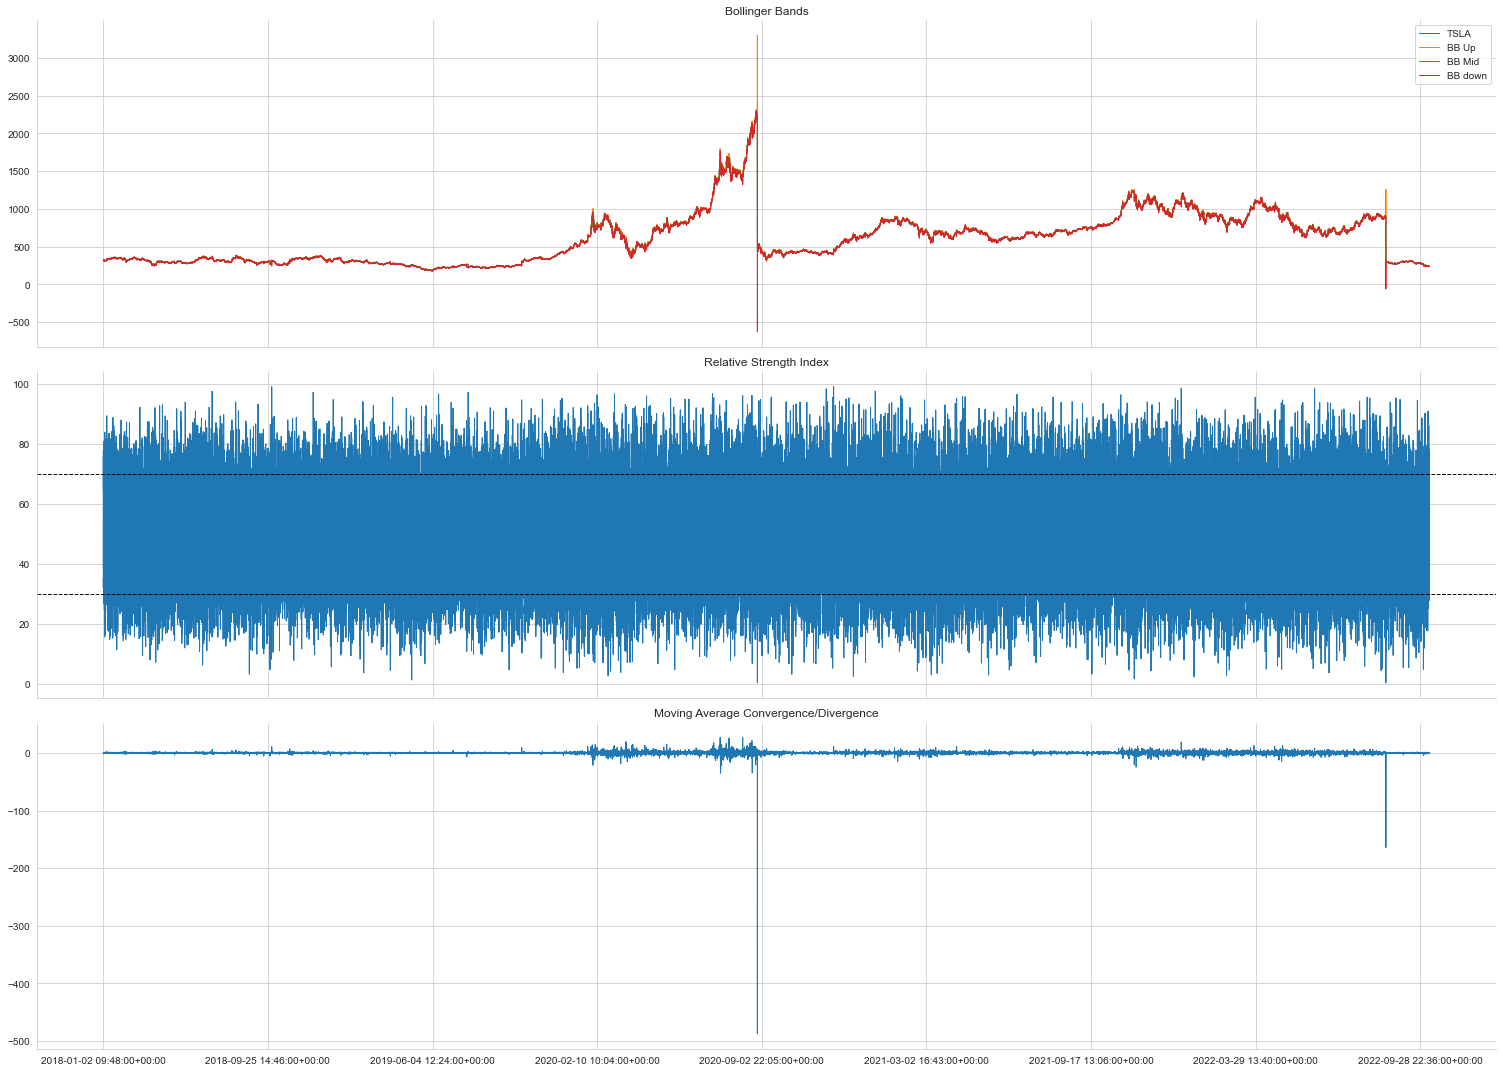

In [13]:
fig, axes= plt.subplots(nrows=3, figsize=(21, 15), sharex=True)
data.drop(['RSI', 'MACD'], axis=1).plot(ax=axes[0], lw=1, title='Bollinger Bands')
data['RSI'].plot(ax=axes[1], lw=1, title='Relative Strength Index')
axes[1].axhline(70, lw=1, ls='--', c='k')
axes[1].axhline(30, lw=1, ls='--', c='k')
data.MACD.plot(ax=axes[2], lw=1, title='Moving Average Convergence/Divergence', rot=0)
axes[2].set_xlabel('')
fig.tight_layout()
sns.despine();

In [14]:
# Save combined plot as jpeg
#plt.savefig('../images/combined_tesla.jpeg')